In [1]:
# импортируем модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
from urllib.parse import urlencode
from datetime import datetime

## Предварительный этап: выгрузка данных

In [2]:
# выгружаем исходные данные (1/3 — таблица с уникальными идентификаторами пользователей: customers_original)
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
customers_original = pd.read_csv(requests.get(final_url).json()['href'])
customers_original.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# выгружаем исходные данные (2/3 — таблица заказов: orders_original)
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
orders_original = pd.read_csv(requests.get(final_url).json()['href'])

In [4]:
# преобразуем в datetime соответствующие колонки (5 шт.)
orders_original.order_purchase_timestamp = pd.to_datetime(orders_original.order_purchase_timestamp)
orders_original.order_approved_at = pd.to_datetime(orders_original.order_approved_at)
orders_original.order_delivered_carrier_date = pd.to_datetime(orders_original.order_delivered_carrier_date)
orders_original.order_delivered_customer_date = pd.to_datetime(orders_original.order_delivered_customer_date)
orders_original.order_estimated_delivery_date = pd.to_datetime(orders_original.order_estimated_delivery_date)
orders_original.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
# проверка типов данных
orders_original.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [6]:
# выгружаем исходные данные (3/3 —  товарные позиции, входящие в заказы: products_original)
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
products_original = pd.read_csv(requests.get(final_url).json()['href'])

In [7]:
# преобразуем в datetime соответствующие колонки (1 шт.)
products_original.shipping_limit_date = pd.to_datetime(products_original.shipping_limit_date)
products_original.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# проверка типов данных
products_original.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [9]:
# создаём сводную таблицу с покупками согласно критериям (см. README.md)
purchases = orders_original[orders_original.order_approved_at.isna() != True] \
    .query("order_status != 'canceled' & order_status != 'unavailable'")
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [10]:
# объединяем два датафрейма - с данными о пользователях и о покупках:
customers_purchases = purchases.merge(customers_original, on='customer_id', how = 'left')
customers_purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### Строим RFM-сегментацию пользователей

В качестве текущей даты возьмём 1 октября 2018 года

In [11]:
# текущая дата - 1 октября 2018 года
date_now = datetime(2018, 10, 1)

In [12]:
# возьмем датафрейм с покупками и объединим с датафреймом с товарами
customers_products = customers_purchases.merge(products_original, on='order_id')

In [13]:
customers_products.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
dtype: object

Для подсчёта итоговой стоимости оставляем данные из колонки 'price' в качестве стоимости товара в заказе.

In [14]:
# уберем лишние колонки
customers_products = customers_products[['customer_unique_id',
                                        'order_approved_at',
                                        'price']] \
                                        .sort_values('order_approved_at')
customers_products.head()

,customer_unique_id,order_approved_at,price
34625,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,44.99
34624,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,44.99
34623,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,44.99
72088,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32,32.49
7575,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23,29.99


In [15]:
# сделаем колонку recency - сколько дней прошло с момента покупки до текущей даты
customers_products['recency'] = date_now - customers_products['order_approved_at']
customers_products['recency'].astype('timedelta64[D]')
customers_products['recency'] = customers_products['recency'] / np.timedelta64(1, 'D')
customers_products['recency'] = np.ceil(customers_products['recency']) # округлим количесвто дней вверх
customers_products.head()

,customer_unique_id,order_approved_at,price,recency
34625,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,44.99,746.0
34624,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,44.99,746.0
34623,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,44.99,746.0
72088,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32,32.49,727.0
7575,87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23,29.99,727.0


In [16]:
# формируем датафрейм с rfm данными
rfmTable = customers_products.groupby('customer_unique_id') \
    .agg({'recency': lambda x: x.min(), # Recency
    'customer_unique_id': lambda x: len(x), # Frequency
    'price': lambda x: x.sum()}) # Monetary Value

rfmTable.rename(columns={'customer_unique_id': 'frequency', 'price': 'monetary'}, inplace=True)
rfmTable = rfmTable.reset_index()
rfmTable.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,144.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,147.0,1,18.90
2,0000f46a3911fa3c0805444483337064,570.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,354.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,321.0,1,180.00


In [17]:
# проверка итогового rfm-датафрейма
# возьмём одного из наиболее активных заказчиков: 0f5ac8d5c31de21d2f25e24be15bbffb с 18 отметками о покупке
customers_products.customer_unique_id.value_counts()

c8460e4251689ba205045f3ea17884a1    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
698e1cf81d01a3d389d96145f7fa6df8    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
                                    ..
e933826051385d0cb7ca172238a49317     1
cb65aa42084cf10378211967049d731f     1
37ec72cc9079a6522951b4a0dcfeb219     1
9e30a4340db1e8165c0a29ba6780091a     1
e9610db1ce903b47ea5afa0927762873     1
Name: customer_unique_id, Length: 94970, dtype: int64

In [18]:
# frequency совпало
rfmTable[rfmTable.customer_unique_id == '0f5ac8d5c31de21d2f25e24be15bbffb']

,customer_unique_id,recency,frequency,monetary
5717,0f5ac8d5c31de21d2f25e24be15bbffb,308.0,18,1252.35


In [19]:
# recency совпало
rfmTable[rfmTable.customer_unique_id == '0f5ac8d5c31de21d2f25e24be15bbffb'].recency == \
customers_products[customers_products.customer_unique_id == '0f5ac8d5c31de21d2f25e24be15bbffb'].recency.min()

5717    True
Name: recency, dtype: bool

In [20]:
# monetary совпало
rfmTable[rfmTable.customer_unique_id == '0f5ac8d5c31de21d2f25e24be15bbffb'].monetary == \
customers_products[customers_products.customer_unique_id == '0f5ac8d5c31de21d2f25e24be15bbffb'].price.sum()

5717    True
Name: monetary, dtype: bool

In [21]:
# посмотрим по квантилям
quintiles = rfmTable[['recency', 'frequency', 'monetary']].quantile([.25, .4, .5, .6, .8]).to_dict()
quintiles

{'recency': {0.25: 147.0, 0.4: 209.0, 0.5: 252.0, 0.6: 300.0, 0.8: 416.0},
 'frequency': {0.25: 1.0, 0.4: 1.0, 0.5: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.25: 47.9, 0.4: 69.9, 0.5: 89.89, 0.6: 109.9, 0.8: 179.9}}

Видим, что не менее 80% покупатели сделали всего одну покупку.

Выручка от не менее чем 80% покупателей составила менее 180 у.е.

In [22]:
# Посмотрим, сколько покупателей с выручкрй больше 200 - 15334.
rfmTable[rfmTable.monetary >200].shape

(15334, 4)

Поговорим о разбивке по границам.
Примем во внимание следующее:

1) подавляющее большинство покупателей совершили всего одну покупку в течение периода

2) отчётный период: 15 сентября 2016 - 3 сентября 2018 (~ 2 года), а с момента последней покупки пройдёт 28 дней, с первой - 746 дней (т.к. "точка отсчета" - 1 октября 2018)


### Категории

**recency**: 1 *("недавние")* - покупка в течение ~ 4 месяцев до тек. даты (25 процентиль), 2 *("спящие")* - покупка в период ~ от 4 месяцев до 7.5 месяцев от текущей даты (26 - 50 процентиль), 3 *("уходящие")* - более ранние покупки (от 51 процентиля)

**frequency**: 1 *("частые")* - совершили более 5 покупок, 2 *("редкие")* - совершили от 2 до 5 покупок вкл., 3 *("разовые")* - совершили одну покупку

**monetary**: 1 *("высокий чек")* - выручка от 200, 2 *("средний чек")* - выручка менее 200, 3 *("низкий чек")* - выручка менее 90 (см. 50 процентиль)

In [23]:
# определим ряд функций для присвоения ранговых переменных

# recency
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 1
    elif x <= quintiles['recency'][.5]:
        return 2
    return 3

# frequency
def f_score(x):
    if x <= 1:
        return 3
    elif x <= 5:
        return 2
    return 1

# monetary
def m_score(x):
    if x < 90:
        return 3
    elif x < 200:
        return 2
    return 1

In [24]:
# применим вышеуказанные функции для присвоения рангов

rfmTable['R'] = rfmTable['recency'].apply(lambda x: r_score(x))
rfmTable['F'] = rfmTable['frequency'].apply(lambda x: f_score(x))
rfmTable['M'] = rfmTable['monetary'].apply(lambda x: m_score(x))
rfmTable.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,144.0,1,129.90,1,3,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,147.0,1,18.90,1,3,3
2,0000f46a3911fa3c0805444483337064,570.0,1,69.00,3,3,3
3,0000f6ccb0745a6a4b88665a16c9f078,354.0,1,25.99,3,3,3
4,0004aac84e0df4da2b147fca70cf8255,321.0,1,180.00,3,3,2


In [25]:
# создаём общеую колонку - RFM_Score
rfmTable['RFM_Score'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)
rfmTable.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,144.0,1,129.90,1,3,2,132
1,0000b849f77a49e4a4ce2b2a4ca5be3f,147.0,1,18.90,1,3,3,133
2,0000f46a3911fa3c0805444483337064,570.0,1,69.00,3,3,3,333
3,0000f6ccb0745a6a4b88665a16c9f078,354.0,1,25.99,3,3,3,333
4,0004aac84e0df4da2b147fca70cf8255,321.0,1,180.00,3,3,2,332


Получилось 27 категорий. Попробуем свести их к меньшему числу - 8 категорий:

1) *'champions'* - недавно покупали, часто, на среднюю сумму или выше: **RFM_Score - 111, 112**

2) *'loyal customers'* - покупали недавно, часто, но на низкую сумму (1), или покупали редко, недавно, на среднюю сумму или выше (2): **RFM_Score - 113, 121, 122**

3) *'potential  loyalists'* - покупали редко, недавно, на низкую сумму (1), или недавно 1 раз купили на высокий чек (2): **RFM_Score - 131, 123**

4) *'promising'* - покупали недавно, 1 раз, на среднюю сумму и ниже: **RFM_Score - 132, 133**

5) *'need attention'* - покупали больше 1 раза более полугода назад (но в течение года): **RFM_Score - 211, 212, 213, 221, 222, 223**

6) *'about to sleep'* - покупали более полугода назад (но в течение года), 1 покупка: **RFM_Score - 231, 232, 233** 

7) *'at risk'* - были более года назад, покупали больше 1 раза, **RFM_Score - 311, 312, 313, 321, 322, 323**

8) *'hibernating'* - были более года назад, покупали 1 раз, **RFM_Score - 331, 332, 333**

In [26]:
# создадим функцию, возвращающую категорию по RFM-эквиваленту
def categories(x):
    if x in ('111', '112'):
        return 'champions'
    elif x in ('113', '121', '122'):
        return 'loyal customers'
    elif x in ('131', '123'):
        return 'potential loyalists'
    elif x in ('132', '133'):
        return 'promising'
    elif x in ('211', '212', '213', '221', '222', '223'):
        return 'need attention'
    elif x in ('231', '232', '233'):
        return 'about to sleep'
    elif x in ('331', '332', '333'):
        return 'hibernating'
    return 'at risk'

rfmTable['category'] = rfmTable['RFM_Score'].apply(lambda x: categories(x))
rfmTable.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score,category
0,0000366f3b9a7992bf8c76cfdf3221e2,144.0,1,129.90,1,3,2,132,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,147.0,1,18.90,1,3,3,133,promising
2,0000f46a3911fa3c0805444483337064,570.0,1,69.00,3,3,3,333,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,354.0,1,25.99,3,3,3,333,hibernating
4,0004aac84e0df4da2b147fca70cf8255,321.0,1,180.00,3,3,2,332,hibernating


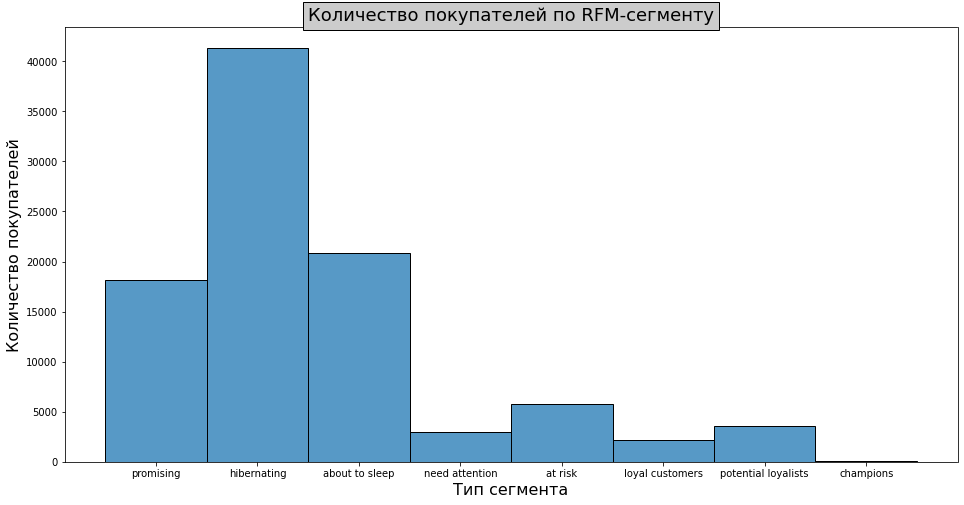

In [28]:
plt.figure(figsize=(16, 8))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title('Количество покупателей по RFM-сегменту', bbox={'facecolor':'0.8', 'pad':5}, fontsize=18)
plt.xlabel('Тип сегмента', fontsize=16)
plt.ylabel('Количество покупателей', fontsize=16)
sns.histplot(rfmTable.category)